# 1. Introduction

In this notebook we are going to deal with a supervised learning(learning with a teacher) problem called **Classification** using a boosting technique, CatBoost.

## 1.1. Classification

It is one type of supervised learning method where the target variable is categorical. The problem can be of binary class classification i.e. whether an email is spam or not, loan will be default or not etc. or it can be multiclass classification, predicting the type of fruit on the shape, size and colour.

There are numerous techniques to solve such task. In this notebook we are going to use Amazon Employees Resource Access classifier using CatBoost which is based on boosting. Boosting is an ensemble method of learning, that used to combine weak classifiers into a strong one.

### 1.1.1 CatBoost
CatBoost is developed by Yandex Research Lab at Moscow. The major strength of CatBoost is that it can work with categorical data without throwing any error like scikit-learn do. It has one-hot encoder already coded insided it. We only need to specify the categorical feature and rest is all done by catboost. CatBoost uses boosting concept. It prevents overfiiting of the model because the trees learned at every iterations are different(generates a random permutation from samples every time). CatBoost can also work with missing values.

# 2. Steps Involved:
    0. Importing the required libraries - for importing all the dependencies
    1. Making functions of the required steps
    2. Importing dataset
    3. Exploratory Data Analysis (EDA) - for checking the nature and structure of the dataset
    4. Feature Engineering - for getting features from the dataset
    5. Model Building - for building the model (using catboost)
    6. Model Training - fitting the model for classification
    7. Model Visualization
    8. Model Testing
    9. Model Evaluation
    10.Saving the model - for re-use
    
# 3. Prerequisites

## 3.1 Dataset 
amazon_employee_train.csv has been used as dataset which consist of 10 columns:
    1. ACTION
    2. RESOURCE
    3. MGR_ID
    4. ROLE_ROLLUP_1
    5. ROLE_ROLLUP_2
    6. ROLE_DEPTNAME
    7. ROLE_TITLE
    8. ROLE_FAMILY_DESC
    9. ROLE_FAMILY
    10.ROLE_CODE
    
## 3.2 Libraries Required
``` 
    numpy == 1.16.3
    pandas == 0.24.2
    matplotlib == 3.0.3
    scikit_learn == 0.21.2
    catboost == 0.15.1
```
    
# 4. Use Case
Some famous use cases of CatBoost are :
    1. HR Analytics for predicting the Employee Attrition
    2. In retail for predicting the item to be bought by customer

## Step 0. Importing the required libraries

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import pickle

# Preprocessing and Training
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

# Evaluation
from sklearn.metrics import accuracy_score, classification_report

## Step 1. Making functions of the required steps

In [2]:
# FUNCTION FOR IMPORTING THE DATASET
# Input: path of the dataset (CSV)
# Output: dataframe 

def import_dataset(path):
    df = pd.read_csv(path)
    return df

In [3]:
# FUNCTION FOR CHECKING DUPLiCATE ROWS
# Input : dataframe
# Output: no. of duplicate rows

def num_duplicate(df):
    return len(df[df.duplicated() == True])

In [4]:
# FUNCTION FOR COUNTING VALUES OF EACH COLUMNS
# Input: dataframe
# Output: column names with the count of unique values

def count_unique_vals(df):
    for col in df.columns:
        print(col, df[col].nunique())

In [5]:
# FUNCTION FOR PLOTTING CATEGORIES
# Input: dataframe and column name
# Output: bar graph that shows the distribution of values of each category.

def plt_category(df, col_name):
    font_style = {'size':14, 'weight':'bold', 'color':'#000000'}
    df[col_name].value_counts().plot(kind='bar', color=['#005f00', '#8f0000'], 
                                     alpha=0.8)
    
    plt.xlabel('ACTION', fontdict=font_style)
    plt.ylabel('Count', fontdict=font_style)
    plt.show()

In [6]:
# FUNCTION FOR GETTING FEATURE AND LABEL
# Input: dataframe
# Output: numpy array of feature and label

def get_feature_label(df):
    X = df.iloc[:, 1:].values
    y = df.iloc[:, 0].values
    
    return X, y

In [7]:
# FUNCTION FOR SPLITTING DATASET INTO TRAIN AND TEST
# Input: Input features and label
# Output: Splitted dataset into train and test

def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                        random_state=5, stratify=y)
    return X_train, X_test, y_train, y_test

In [8]:
# FUNCTION FOR BUILDING THE MODEL
# Input: parameters dictionary
# Output: catboost object

def build_model(params):
    cat_boost_clf = CatBoostClassifier(**params)
    return cat_boost_clf

In [9]:
# FUNCTION FOR MODEL TRAINING
# Input: model object, training set and training labels
# Output: trained model

def train_model(cat_boost_clf, X_train, y_train):
    cat_boost_clf.fit(X_train, y_train);

In [10]:
# FUNCTION FOR PLOTTING ERROR RATE VS ITERATION
# Input: dataframe and column name
# Output: line plot

def plt_scores(df, col_name):
    plt.plot(df['iter'], df[col_name], linewidth=2)
    plt.xlabel('Iteration')
    plt.ylabel(col_name)
    plt.title(col_name + ' vs Iteration')
    plt.show()

In [11]:
# FUNCTION FOR MODEL EVALUATION
# Input: True values and predicted values
# Output: Accuracy score and classification report

def eval_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    clf_report = classification_report(y_test, y_pred)
    
    print("Accuracy= {:.2f}%".format(100 * accuracy))
    print("Classification report:", clf_report, sep='\n')

In [12]:
# FUNCTION FOR SAVING THE MODEL
# Input: model object, file name
# Output: pickle file of the model

def save_pickle(model_object, file_name):
    file_pkl = open(file_name, 'wb')
    pickle.dump(model_object, file_pkl)
    file_pkl.close()

## Step 2. Importing dataset

In [13]:
# Importing CSV
path = 'data/amazon_employee.csv'
amazon = import_dataset(path)

## Step 3. Exploratory Data Analysis

In [14]:
# Checking the structure of data
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
ACTION              32769 non-null int64
RESOURCE            32769 non-null int64
MGR_ID              32769 non-null int64
ROLE_ROLLUP_1       32769 non-null int64
ROLE_ROLLUP_2       32769 non-null int64
ROLE_DEPTNAME       32769 non-null int64
ROLE_TITLE          32769 non-null int64
ROLE_FAMILY_DESC    32769 non-null int64
ROLE_FAMILY         32769 non-null int64
ROLE_CODE           32769 non-null int64
dtypes: int64(10)
memory usage: 2.5 MB


In [15]:
# Checking the shape of data
# First entry represent the number of rows and second represents columns
amazon.shape

(32769, 10)

In [16]:
# Checking the dataset
amazon.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [17]:
# Counting unique values in each column
count_unique_vals(amazon)

ACTION 2
RESOURCE 7518
MGR_ID 4243
ROLE_ROLLUP_1 128
ROLE_ROLLUP_2 177
ROLE_DEPTNAME 449
ROLE_TITLE 343
ROLE_FAMILY_DESC 2358
ROLE_FAMILY 67
ROLE_CODE 343


**All features are categorical. `ACTION` is the target feature here.**

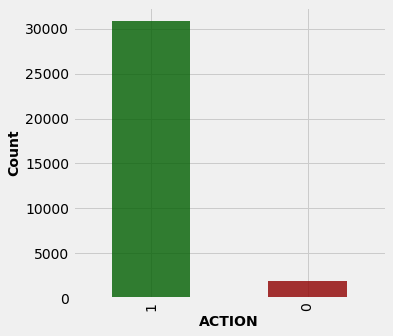

In [18]:
# Plotting distribution of ACTION

# Plot style
plt.style.use('fivethirtyeight')
# Plot size
plt.rcParams['figure.figsize'] = [5, 5]

plt_category(df=amazon, col_name='ACTION')

## Step 4. Feature Engineering

In [19]:
# Getting feature and label
X, y = get_feature_label(amazon)

In [20]:
# Splitting dataset into train and test set
X_train, X_test, y_train, y_test = split_data(X, y)

In [21]:
# List of categorical features
cat_features = list(range(X.shape[1]))

## Step 5. Model Building

In [22]:
# Setting up the hyperparameters
params = {'loss_function':'Logloss',
          'eval_metric':'Accuracy',
          'cat_features': cat_features,
          'early_stopping_rounds': 200,
          'verbose': 200,
          'random_seed': 5
         }

In [23]:
# Building the model
cat_boost_clf = build_model(params)

## Step 6. Model Training

In [24]:
# Training the model
train_model(cat_boost_clf, X, y)

Learning rate set to 0.044978
0:	learn: 0.9421099	total: 77.5ms	remaining: 1m 17s
200:	learn: 0.9530959	total: 9.72s	remaining: 38.7s
400:	learn: 0.9554762	total: 19.9s	remaining: 29.8s
600:	learn: 0.9570631	total: 30.4s	remaining: 20.2s
800:	learn: 0.9579786	total: 43s	remaining: 10.7s
999:	learn: 0.9588941	total: 54s	remaining: 0us


## Step 7. Model Visualization

In [25]:
# Read the tsv generated after training the model
acc_vals = pd.read_csv('catboost_info/learn_error.tsv', sep='\t')

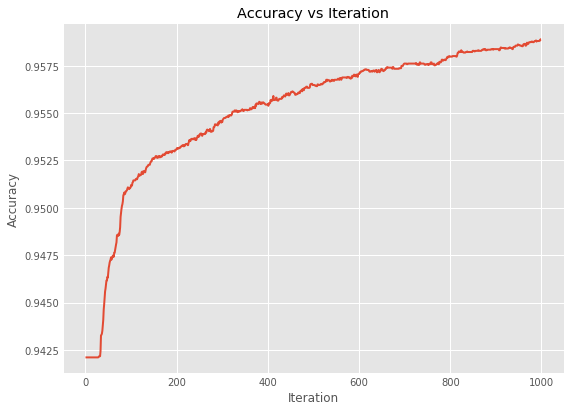

In [26]:
# Visualizing accuracy vs iteration

# Plot style
plt.style.use('ggplot')
# Plot size
plt.rcParams['figure.figsize'] = [8, 6]

plt_scores(acc_vals, col_name='Accuracy')

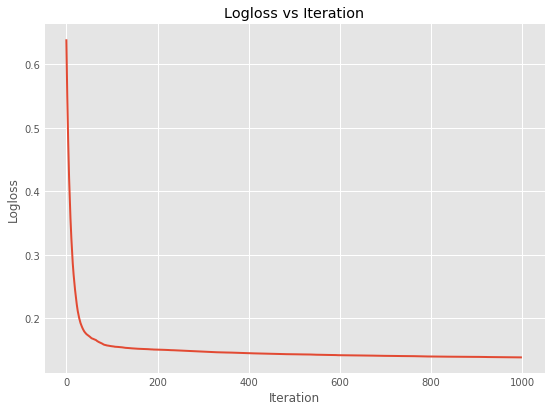

In [27]:
# Visualizing logloss vs iteration

# Plot style
plt.style.use('ggplot')
# Plot size
plt.rcParams['figure.figsize'] = [8, 6]

plt_scores(acc_vals, col_name='Logloss')

## Step 8. Model Testing

In [28]:
# Predicting values
y_pred = cat_boost_clf.predict(X_test)

## Step 9. Model Evaluation

In [29]:
# Performance  of the model
eval_model(y_test, y_pred)

Accuracy= 98.69%
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       379
           1       0.99      1.00      0.99      6175

    accuracy                           0.99      6554
   macro avg       0.97      0.91      0.94      6554
weighted avg       0.99      0.99      0.99      6554



## Step 10. Saving the model

In [30]:
# Saving the trained model
save_pickle(cat_boost_clf, 'models/catboost_clf.pkl')